In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
os.chdir(r'C:\Users\Paula\Documents\Facultad\Física Computacional\Ising')

M = np.loadtxt('Correlacion_MvsJ_dim32_Barridos1100000.txt')
E = np.loadtxt('Correlacion_EvsJ_dim32_Barridos1100000.txt')
# habria que darle M a la funcion Chi y E a la funcion Calor.

In [18]:
def Chi(archivo,tau,destermalizo):
    Cant_J = len(archivo[:,0])
    N_total = len(archivo[0,:])
    Js = []
    Mcuad_prom = []
    M_prom = []
    for j in range (Cant_J):
        Js.append(1/archivo[j,0]) # creo el vector de 1/J's
        M2 = 0
        M1 = 0
        
        M_seleccion = []
        # Aca selecciono los M's con los que voy a trabajar de toda la tira de M's que hay para un J (elegidos para que esten descorrelacionados segun el tau ingresado)
        for k in range (destermalizo,N_total,tau):
            M_seleccion.append(archivo[j,k]) 
    
        N = len(M_seleccion)
        for i in range (0,N):
            M2 += M_seleccion[i]**2 # sumo los elementos de M_seleccion al cuadrado, esto para scar el promedio <M^2>
            M1 += M_seleccion[i] # sumo los elementos de M_seleccion, esto para scar el promedio <M>
        promM2 = M2/N # Divido por la longitud para tener el promedio
        promM1 = M1/N # idem
        Mcuad_prom.append(promM2) # en el vector Mcuad_prom guardo en la misma posicion que su J, el valor de <M^2>
        M_prom.append(promM1) # en el vector M_prom guardo en la misma posicion que su J, el valor de <M>

    Chi = (np.array(Mcuad_prom) - np.array(M_prom)**2)*N # vector de chi para cada J

    # Ahora tenemos un vector de Chi y su correspondiente J entonces podemos pltear:

    plt.figure(figsize = (9,7))
    plt.plot(Js,Chi,'mo',fillstyle = 'none')
    plt.xlabel('1/J*', fontsize = 15);
    plt.ylabel('Chi', fontsize = 15);
    plt.grid();
    plt.show();
    
    
    
    
def Calor(archivo,tau,destermalizo):
    Cant_J = len(archivo[:,0])
    N_total = len(archivo[0,:])
    Js = []
    Ecuad_prom = []
    E_prom = []
    for j in range (Cant_J):
        Js.append(1/archivo[j,0]) # creo el vector de 1/J's
        E2 = 0
        E1 = 0
        E_seleccion = []
        # Aca selecciono los E's con los que voy a trabajar de toda la tira de E's que hay para un J (elegidos para que esten descorrelacionados segun el tau ingresado)
        for k in range (destermalizo,N_total,tau):
            E_seleccion.append(archivo[j,k]) 
    
        N = len(E_seleccion)
        for i in range (0,N):
            E2 += E_seleccion[i]**2 # sumo los elementos de M_seleccion al cuadrado, esto para scar el promedio <M^2>
            E1 += E_seleccion[i] # sumo los elementos de M_seleccion, esto para scar el promedio <M>
        promE2 = E2/N # Divido por la longitud para tener el promedio
        promE1 = E1/N # idem
        Ecuad_prom.append(promE2) # en el vector Mcuad_prom guardo en la misma posicion que su J, el valor de <M^2>
        E_prom.append(promE1) # en el vector M_prom guardo en la misma posicion que su J, el valor de <M>

    Calor = (np.array(Ecuad_prom) - np.array(E_prom)**2)*N # vector de chi para cada J

    # Ahora tenemos un vector de Chi y su correspondiente J entonces podemos pltear:

    plt.figure(figsize = (9,7))
    plt.plot(Js,Calor,'mo',fillstyle = 'none')
    plt.xlabel('1/J*', fontsize = 15);
    plt.ylabel('Calor', fontsize = 15);
    plt.grid();
    plt.show();

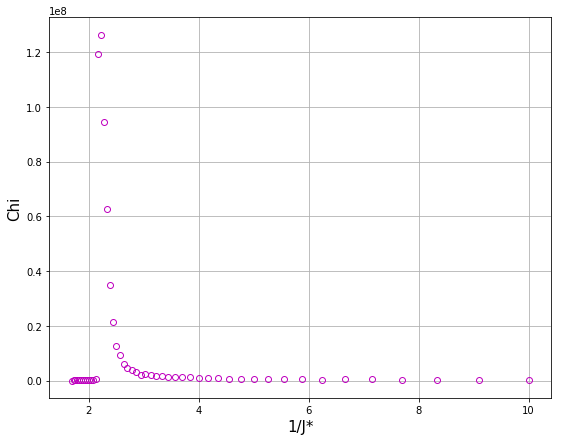

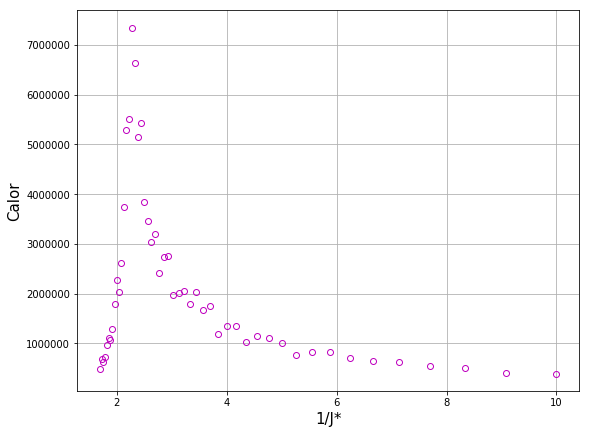

In [19]:
Chi(M,5000,100000)
Calor(E,5000,100000)